In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

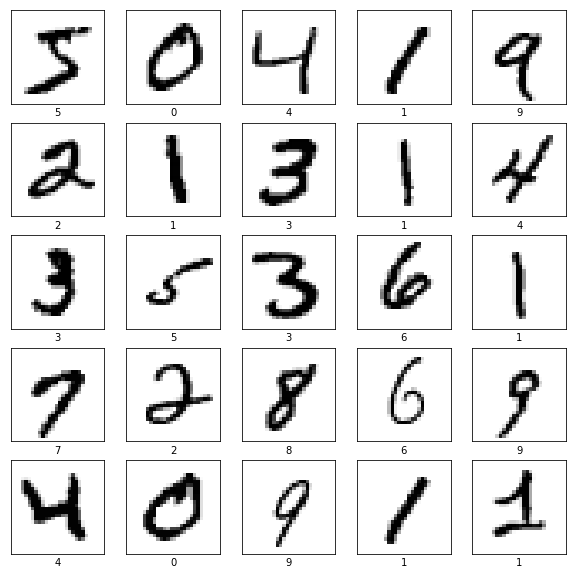

In [3]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

In [4]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(512, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation=tf.nn.softmax))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.2862 - acc: 0.9181
Epoch 2/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.1210 - acc: 0.9648
Epoch 3/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.0837 - acc: 0.9753
Epoch 4/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.0629 - acc: 0.9814
Epoch 5/5
60000/60000 [==============================] - 4s 65us/step - loss: 0.0511 - acc: 0.9847


In [7]:
loss, acc = model.evaluate(x_test, y_test)
print("Accuracy: {}%".format(acc * 100))

10000/10000 [==============================] - 0s 38us/step
Accuracy: 98.0%


In [8]:
predictions = model.predict(x_test)
pred_labels = np.argmax(predictions, axis=1)

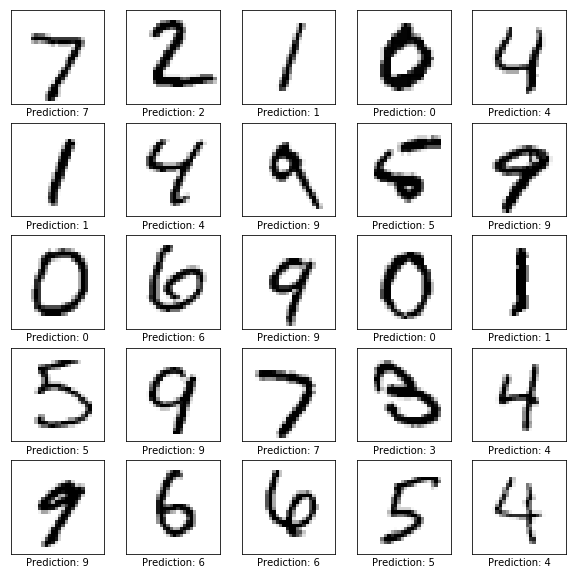

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel("Prediction: {}".format(np.argmax(predictions[i])))

In [10]:
def plot_confusion_matrix(cm, classes):
    cmap = plt.get_cmap('Reds')
    tick_marks = classes

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title("Confusion matrix")
    plt.colorbar()
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], '.2f'),
                     horizontalalignment='center',
                     color='white' if cm[i , j] > thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

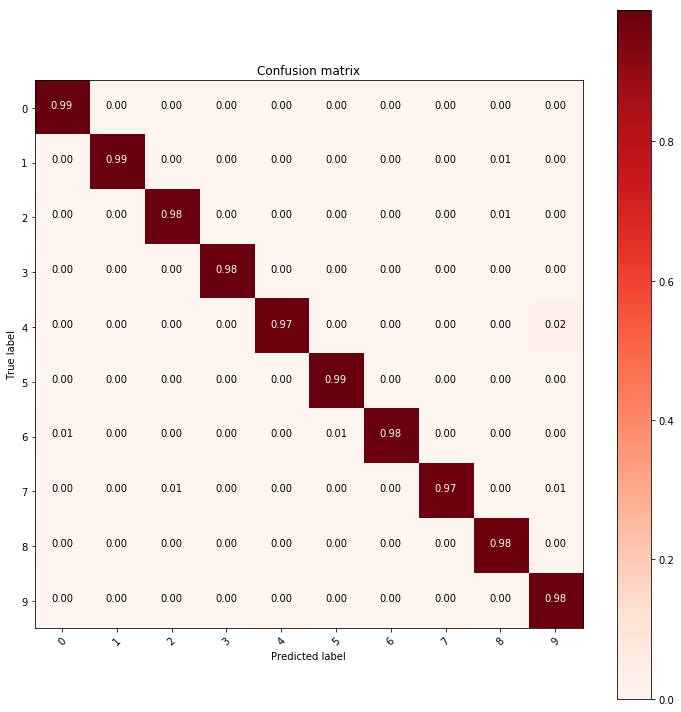

In [11]:
cm = confusion_matrix(y_test, pred_labels)
classes = np.arange(predictions.shape[1])
plot_confusion_matrix(cm, classes)